# Introduction


Objective: Investigate house sales in the King County (Seattle) and build a model to predict a home's price given certain variables.



Data
A dataset has been provided and can be found in the kc_house_data.csv file in this repository.

The column names and descriptions as provided can be found in the column_names.md file in this repository. For convenience they have been reproduced below.

Column Names and descriptions for Kings County Data Set

id - unique identified for a house

dateDate - house was sold

pricePrice - is prediction target

bedroomsNumber - of Bedrooms/House

bathroomsNumber - of bathrooms/bedrooms

sqft_livingsquare - footage of the home

sqft_lotsquare - footage of the lot

floorsTotal - floors (levels) in house

waterfront - House which has a view to a waterfront

view - Has been viewed

condition - How good the condition is ( Overall )

grade - overall grade given to the housing unit, based on King County grading system

sqft_above - square footage of house apart from basement

sqft_basement - square footage of the basement

yr_built - Built Year

yr_renovated - Year when house was renovated

zipcode - zip

lat - Latitude coordinate

long - Longitude coordinate

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


# Scenario

I am a real estate developer, in Seattle, looking to see what home feutures are likely to increase a homes value.

# import libraries


In [2]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from itertools import combinations

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot')


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.formula.api import ols


/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load Data

In [3]:
data=pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Cleaning and EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Drop ID, Condition, and Grade:
    ID is unique to each sale and not based on any relavent...
    Condition and Grade, as defined above, are vauge and unclear

In [5]:
data=data.drop(['id','condition','grade'],axis=1) #drop ['id','condition','grade'] variabels
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  object 
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   17755 non-null  float64
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
dtypes: flo

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Convert date, sqft_basement to manipulatable data types.
Drop/deal with waterfront, view, yr_renovated null values

In [6]:
data['date'] = pd.to_datetime(data['date']) #convert from object

In [7]:
# convert basement
# data=data[data['sqft_basement'] != '?']
data['sqft_basement']=data['sqft_basement'].astype(str).astype(float)

ValueError: could not convert string to float: '?'

In [8]:
# convert basement and drop missing data
data=data[data['sqft_basement'] != '?']
data['sqft_basement']=data['sqft_basement'].astype(str).astype(float)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21143 non-null  datetime64[ns]
 1   price          21143 non-null  float64       
 2   bedrooms       21143 non-null  int64         
 3   bathrooms      21143 non-null  float64       
 4   sqft_living    21143 non-null  int64         
 5   sqft_lot       21143 non-null  int64         
 6   floors         21143 non-null  float64       
 7   waterfront     18804 non-null  float64       
 8   view           21082 non-null  float64       
 9   sqft_above     21143 non-null  int64         
 10  sqft_basement  21143 non-null  float64       
 11  yr_built       21143 non-null  int64         
 12  yr_renovated   17389 non-null  float64       
 13  zipcode        21143 non-null  int64         
 14  lat            21143 non-null  float64       
 15  long           2114

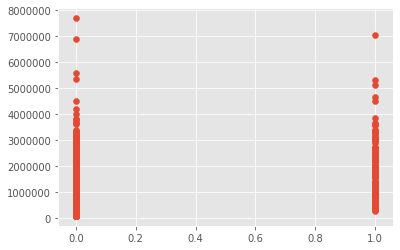

In [10]:
data['waterfront']
plt.scatter(data['waterfront'],data['price']) 

waterfront is a dummy variable so averaging doesnt make sense

In [11]:
data=data[data['waterfront'] .isnull()==False] # drop missing 'waterfront' data, rows

view is only missing a small number of data points so drop missing rows

In [12]:
data=data[data['view'] .isnull()==False] #drop missing 'view' data

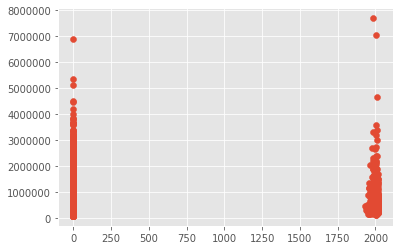

In [13]:
plt.scatter(data['yr_renovated'],data['price'])

yr_renovated is highly biforcated and has enought data to drop missing/null data


In [14]:
data=data[data['yr_renovated'] .isnull()==False] # drop missing 'yr_renovated' data, rows

In [15]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15429 entries, 1 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           15429 non-null  datetime64[ns]
 1   price          15429 non-null  float64       
 2   bedrooms       15429 non-null  int64         
 3   bathrooms      15429 non-null  float64       
 4   sqft_living    15429 non-null  int64         
 5   sqft_lot       15429 non-null  int64         
 6   floors         15429 non-null  float64       
 7   waterfront     15429 non-null  float64       
 8   view           15429 non-null  float64       
 9   sqft_above     15429 non-null  int64         
 10  sqft_basement  15429 non-null  float64       
 11  yr_built       15429 non-null  int64         
 12  yr_renovated   15429 non-null  float64       
 13  zipcode        15429 non-null  int64         
 14  lat            15429 non-null  float64       
 15  long           1542

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

All data is numerical with no null values

check for outliers


In [16]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.542900e+04,15429.000000,15429.000000,15429.00000,1.542900e+04,15429.000000,15429.000000,15429.000000,15429.000000,15429.000000,15429.000000,15429.000000,15429.000000,15429.000000,15429.00000,15429.000000,15429.000000
mean,5.414978e+05,3.378767,2.121508,2085.51656,1.528616e+04,1.494556,0.007518,0.228855,1793.705230,291.811329,1971.130533,81.766544,98077.472098,47.559260,-122.21351,1990.926891,12862.281159
std,3.730219e+05,0.934200,0.767027,919.54924,4.199737e+04,0.538903,0.086384,0.759902,829.165362,443.366153,29.287947,395.668685,53.459610,0.138745,0.14048,684.796238,27783.533647
min,8.200000e+04,1.000000,0.500000,370.00000,5.200000e+02,1.000000,0.000000,0.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.51900,399.000000,659.000000
25%,3.200000e+05,3.000000,1.750000,1430.00000,5.050000e+03,1.000000,0.000000,0.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.469100,-122.32800,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1920.00000,7.620000e+03,1.500000,0.000000,0.000000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.571100,-122.22900,1850.000000,7626.000000
75%,6.435000e+05,4.000000,2.500000,2550.00000,1.072000e+04,2.000000,0.000000,0.000000,2220.000000,560.000000,1997.000000,0.000000,98117.000000,47.677600,-122.12400,2370.000000,10108.000000
max,7.700000e+06,33.000000,8.000000,13540.00000,1.651359e+06,3.500000,1.000000,4.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.31500,6210.000000,871200.000000


In [17]:
# at least 1 clear outlier; 33 bedroom house where 75% is 4
data=data[data['bedrooms']<33]

Check visually for outliers

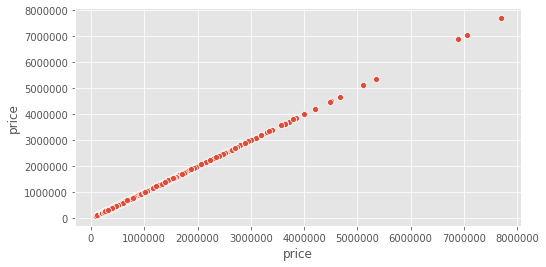

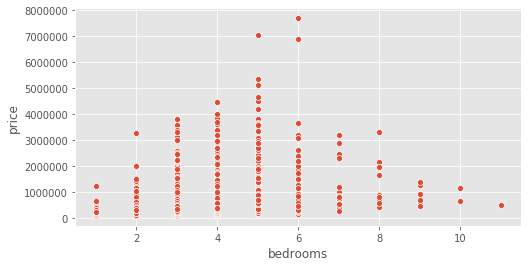

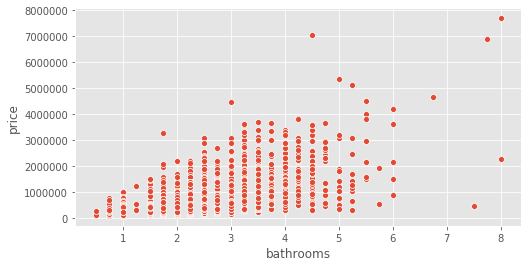

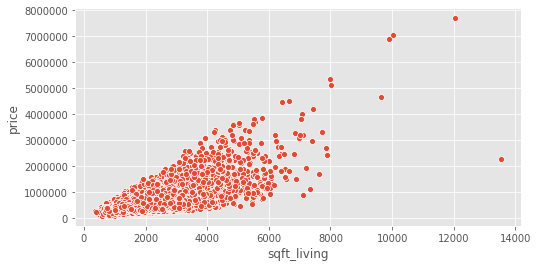

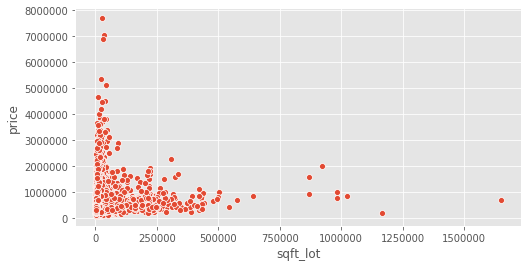

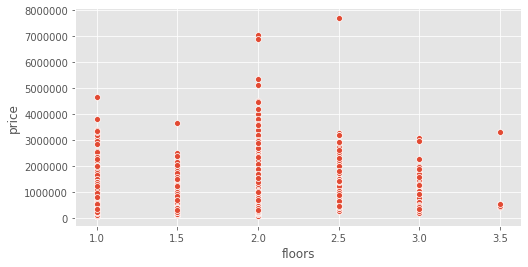

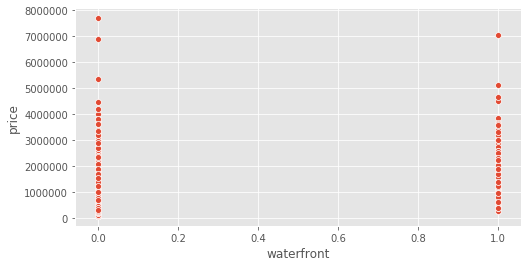

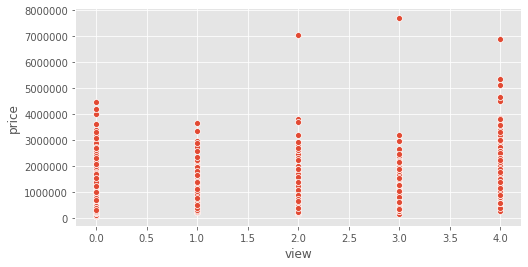

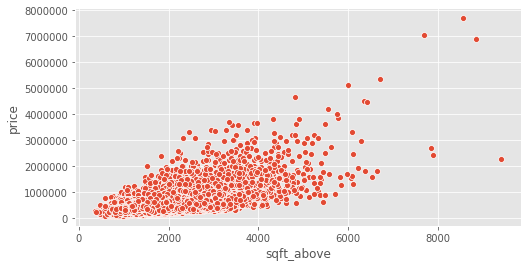

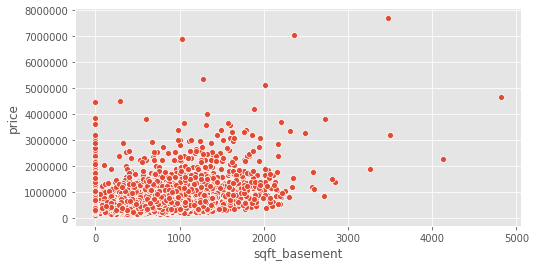

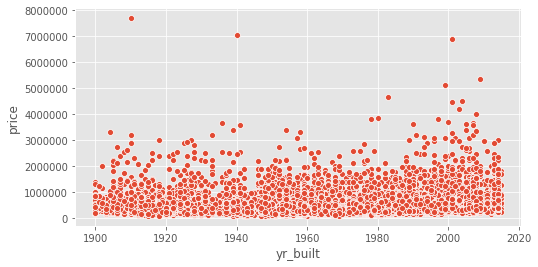

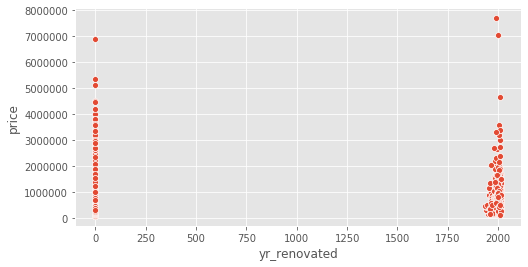

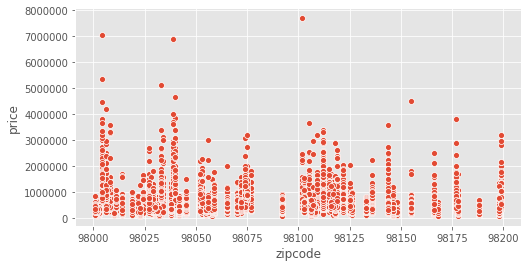

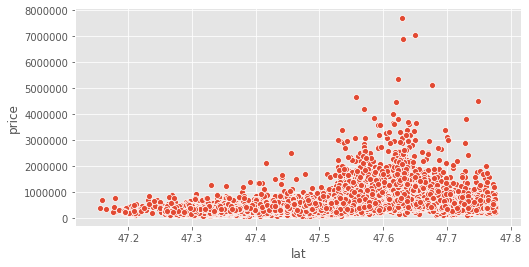

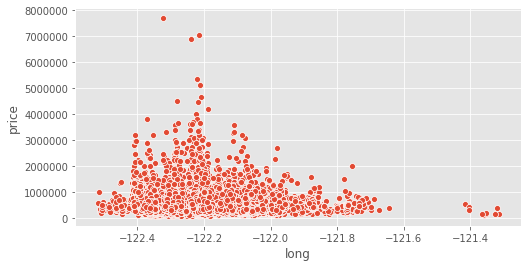

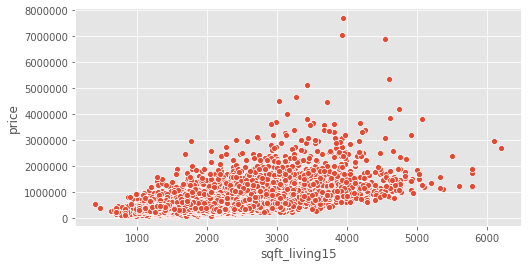

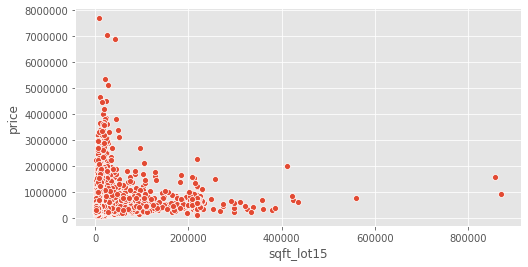

In [18]:
# look vizually for outliers
nd=list(data.columns)
nd.remove('date')
for i in nd:
    fig, ax = plt.subplots(figsize=(8,4))

    sns.scatterplot(data[i],data['price'])


In [19]:
# sqft_living; 2 data points over 12000
# sqft_lot: 1 data point over 1.5 million
# sqft_above: 3 data point over 8000
# sqft_basement: 2 data points over 4000
# long: 8-ish outlier (arounf -121.4): unclear if they are really outliers
# sgft_lot: 2 data points over 800,000

# drop the above data point (excluding long)
data=data[data['sqft_living']<12000]
data=data[data['sqft_lot']<1500000]
data=data[data['sqft_above']<8000]
data=data[data['sqft_basement']<4000]
data=data[data['sqft_lot15']<800000]
data.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.542100e+04,15421.000000,15421.000000,15421.000000,1.542100e+04,15421.000000,15421.000000,15421.000000,15421.000000,15421.000000,15421.000000,15421.000000,15421.000000,15421.000000,15421.000000,15421.000000,15421.000000
mean,5.401305e+05,3.376046,2.119837,2082.700214,1.504900e+04,1.494391,0.007457,0.227677,1791.773750,290.926464,1971.130407,81.549835,98077.487193,47.559242,-122.213564,1990.326243,12710.767071
std,3.631698e+05,0.902379,0.761346,906.251260,3.860637e+04,0.538755,0.086036,0.757480,821.934415,439.889227,29.283235,395.165797,53.463849,0.138742,0.140439,683.864252,25775.091226
min,8.200000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,3.200000e+05,3.000000,1.750000,1430.000000,5.050000e+03,1.000000,0.000000,0.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.469000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.571100,-122.229000,1850.000000,7625.000000
75%,6.420000e+05,4.000000,2.500000,2550.000000,1.071000e+04,2.000000,0.000000,0.000000,2220.000000,560.000000,1997.000000,0.000000,98117.000000,47.677600,-122.124000,2370.000000,10106.000000
max,7.060000e+06,11.000000,7.500000,10040.000000,1.164794e+06,3.500000,1.000000,4.000000,7880.000000,3500.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,560617.000000


Check for multicollinearity

In [20]:
# test for colleations in the variables
df=data.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#drop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates.
df.drop_duplicates(inplace=True)

#correlated variables
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.874884
"(sqft_living, sqft_living15)",0.760537


potential colinearity problems:
consider dropping sqft_living. It is in both pairs and is likely includeded  in other variables i.e. sqft_above and sqft_below

(sqft_above, sqft_living)	0.876449

(sqft_living15, sqft_living)	0.756714

Check for correlation with Price

In [21]:
data.corr()['price']


price            1.000000
bedrooms         0.314969
bathrooms        0.518126
sqft_living      0.701632
sqft_lot         0.084508
floors           0.263569
waterfront       0.276249
view             0.394035
sqft_above       0.607753
sqft_basement    0.309902
yr_built         0.052601
yr_renovated     0.115087
zipcode         -0.049514
lat              0.313877
long             0.022608
sqft_living15    0.589848
sqft_lot15       0.076714
Name: price, dtype: float64

Only 4 vaiables are  correlated with price

bathrooms        0.518126

sqft_living      0.701632

sqft_above       0.607753

sqft_living15    0.589848


# Feature Engineering

dummy variables and catagories

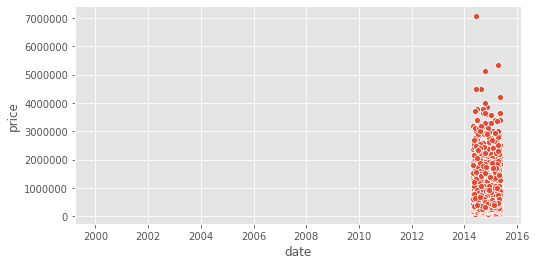

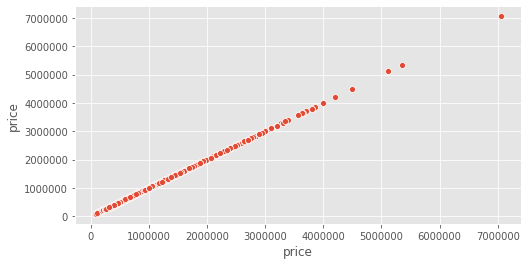

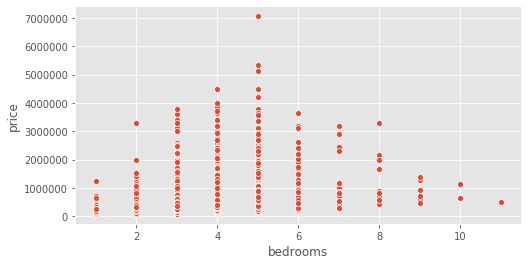

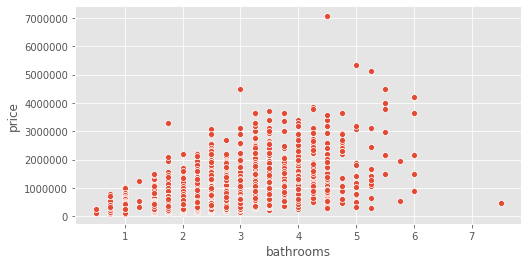

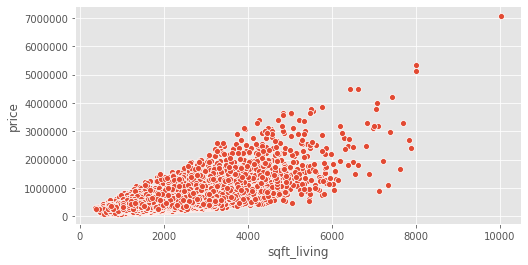

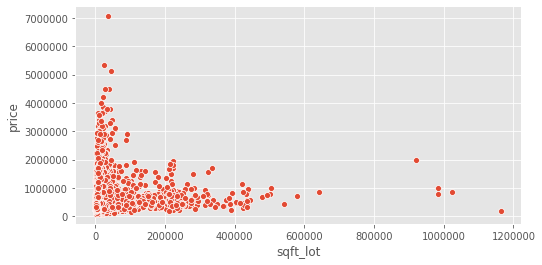

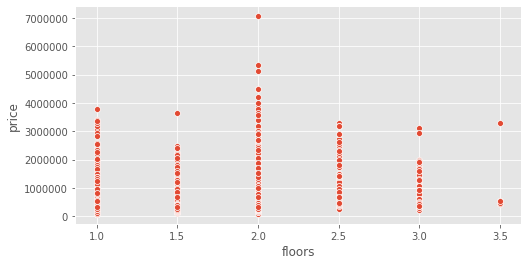

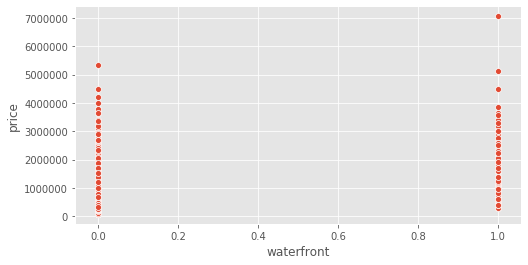

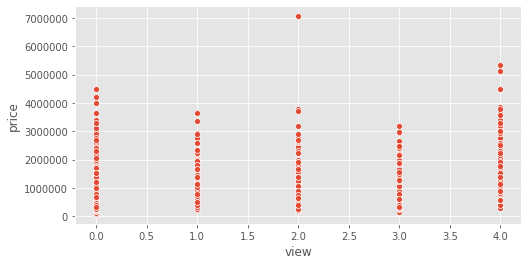

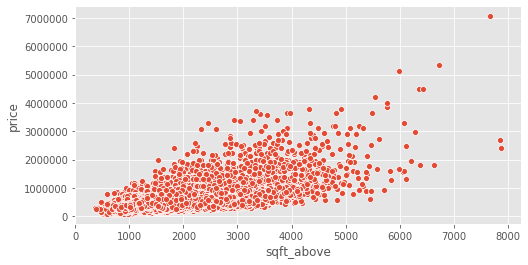

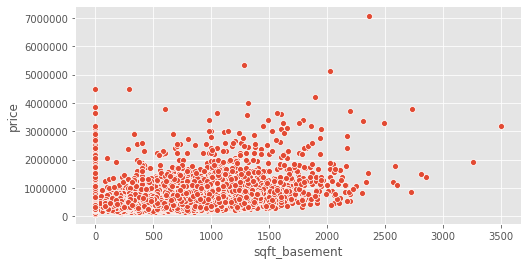

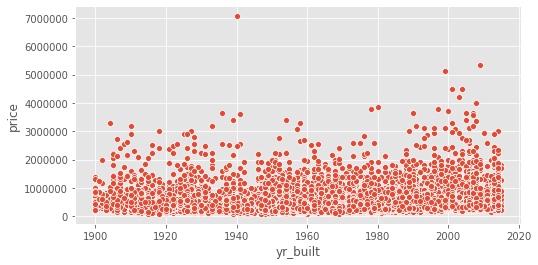

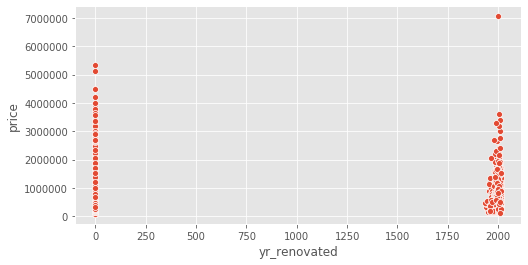

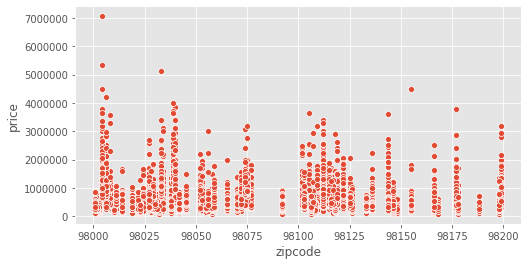

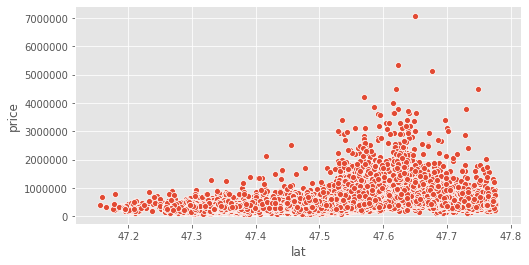

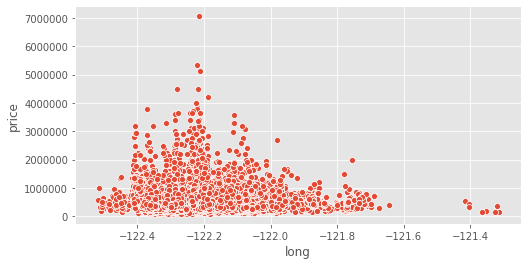

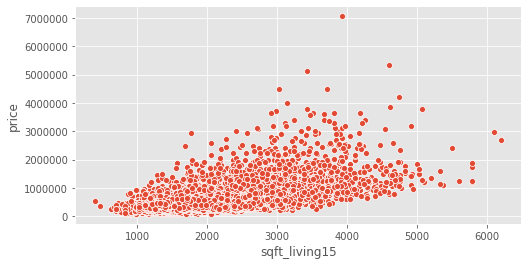

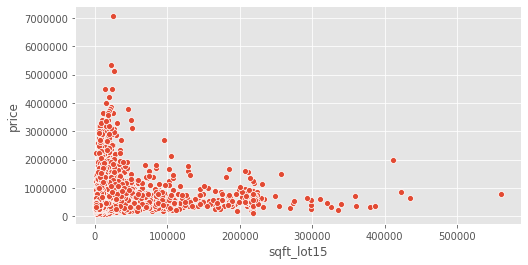

In [22]:
# look for catagories
nd=list(data.columns)
# nd.remove('date')
for i in nd:
    fig, ax = plt.subplots(figsize=(8,4))

    sns.scatterplot(data[i],data['price'])

In [23]:
# Potential Catagories and dummy

# bedrooms?
# floor?
# waterfront: built in dummy
# view?    
# yr_reonovated: catagory or dummy 
# zipcode

# cats=['bedrooms','bathrooms','floors','view','yr_renovated','zipcode']
# cat_names=['bedrooms_dummies','bathrooms_dummies','floors_dummies','view_dummies','yr_renovated_dummies','zipcode_dummies']

bedrooms_dummies=pd.get_dummies(data['bedrooms'], prefix='beds', drop_first=True)
floors_dummies=pd.get_dummies(data['floors'], prefix='floors', drop_first=True)
view_dummies=pd.get_dummies(data['view'], prefix='views', drop_first=True)
yr_renovated_dummies = pd.get_dummies(data['yr_renovated'], prefix='reno', drop_first=True)
zipcode_dummies= pd.get_dummies(data['zipcode'], prefix='zip', drop_first=True)

In [24]:
# add to dataframe
data2 = pd.concat([data,bedrooms_dummies,floors_dummies,view_dummies,yr_renovated_dummies,zipcode_dummies], axis=1)
data2.isnull().sum()


date           0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
              ..
zip_98177      0
zip_98178      0
zip_98188      0
zip_98198      0
zip_98199      0
Length: 174, dtype: int64

# Quesions

Q1: How significant is location on price?

We have lat and long and zipcode as proxies.

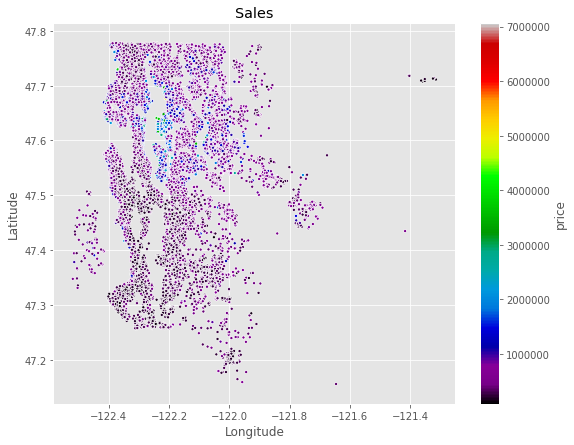

In [25]:

# scatter plot "mapping" lat and long.
plt.figure(figsize = (9,7))
ax = sns.scatterplot(x = data['long'], y = data['lat'], hue = data['price'],
                palette = 'nipy_spectral',s=10, legend = None, data = data)

norm = plt.Normalize(data['price'].min(), data['price'].max())
smap = plt.cm.ScalarMappable(cmap='nipy_spectral', norm=norm)
smap.set_array([])

ax.figure.colorbar(smap, label = 'price')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Sales')
plt.show()


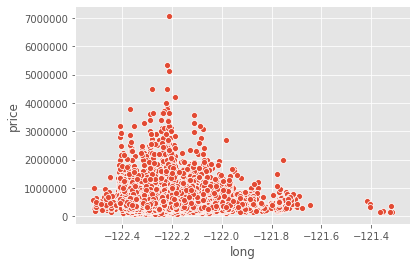

In [26]:
sns.scatterplot(x = data['long'], y = data['price'])


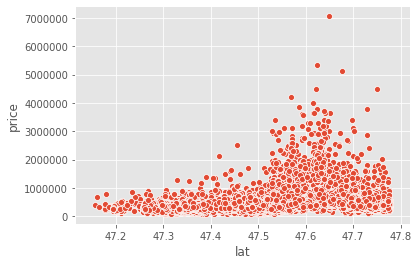

In [27]:
sns.scatterplot(x = data['lat'], y = data['price'])


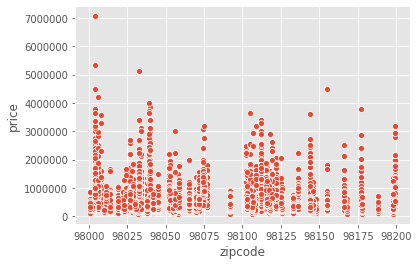

In [28]:
sns.scatterplot(x = data['zipcode'], y = data['price'])


Answer:

Lat and long look to generally be poor predictors of price. 

There does, however, seems to be a loose correlation between lat alone and price. 

Simmilarly, while zipcode is a poor predictor of price, most of the more expensize homes are concentrated in a few zipcodes. 

Q2: Is outdoor space i.e. squarefootage in the 'lot' that is not accupied by the house, usefull?

In [29]:
#percent of each lot taken up by the house
data2['usage']=data2['sqft_living']/data2['sqft_lot']

In [30]:
data2['usage'].describe()

count    15421.000000
mean         0.323261
std          0.268880
min          0.000610
25%          0.156445
50%          0.247866
75%          0.405041
max          4.653846
Name: usage, dtype: float64

Homes can only take up 100% or 1 of the lot so himbers>1 are flawed i.e. impossible.

In [31]:
# drop flawed values i.e. values over 1

data2=data2[data2['usage']<=1]
data2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,...,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,usage
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,2170,...,0,0,0,0,0,0,0,0,0,0.354874
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,1050,...,0,0,0,0,0,0,0,0,0,0.392000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,1680,...,0,0,0,0,0,0,0,0,0,0.207921
5,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3890,...,0,0,0,0,0,0,0,0,0,0.053174
8,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,1050,...,0,0,0,0,0,0,0,0,0,0.238286


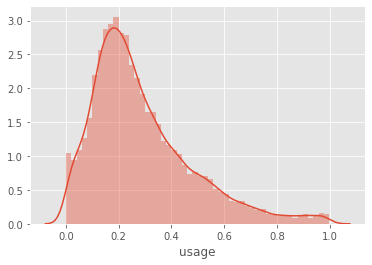

In [32]:
sns.distplot(data2['usage'])

In [33]:
data2['usage'].describe()

count    14857.000000
mean         0.287408
std          0.191687
min          0.000610
25%          0.153043
50%          0.239744
75%          0.380208
max          0.998217
Name: usage, dtype: float64

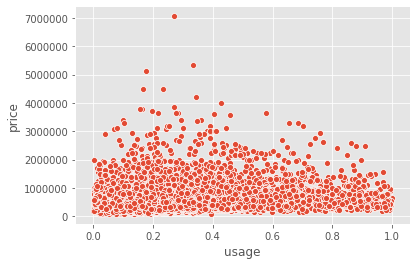

In [34]:
sns.scatterplot(data2['usage'],data2['price'])

In [35]:
data2.corr()['price']['usage']

0.19943241542354198

Answer: The size of a home relative to the size of it's lot does not appear to have a signifigant effect on price. 

Q3: Does the neighborhood a house is in matter?

In [36]:
data2.corr()['sqft_living']['sqft_living15'] #correlation between a home's sqft and that of it's 15 closest neighboors


0.7574869921064877

In [37]:
data2.corr()['sqft_lot']['sqft_lot15'] #correlation between a home's lot size and that of it's 15 closest neighboors

0.6959546773475881

In [38]:
#regression: sqft of 15 closest neighbors to predict sqft of home
sqft_df=data2[['sqft_living','sqft_living15']]
sqft_df.head()

f='sqft_living~sqft_living15'
model = ols(formula=f, data=sqft_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqft_living   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                 2.000e+04
Date:                Sun, 25 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:38:04   Log-Likelihood:            -1.1602e+05
No. Observations:               14857   AIC:                         2.320e+05
Df Residuals:                   14855   BIC:                         2.321e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        81.8808     15.095      5.424      0.000      52.293     111.469
sqft_living15     1.0059      0.007    141.416      0.000       0.992       1.020
==============================================================================
Omnibus:                     4436.552   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23592.186
Skew:                           1.339   Prob(JB):                         0.00
Kurtosis:                       8.562   Cond. No.                     6.55e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
#regression: lot size of 15 closest neighbors to predict lot of home
lot_df=data2[['sqft_lot','sqft_lot15']]
lot_df.head()

f='sqft_lot~sqft_lot15'
model = ols(formula=f, data=lot_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               sqft_lot   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                 1.395e+04
Date:                Sun, 25 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:38:05   Log-Likelihood:            -1.7331e+05
No. Observations:               14857   AIC:                         3.466e+05
Df Residuals:                   14855   BIC:                         3.466e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1880.4758    258.594      7.272      0.000    1373.600    2387.352
sqft_lot15     1.0434      0.009    118.125      0.000       1.026       1.061
==============================================================================
Omnibus:                    29809.130   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        165987786.783
Skew:                          16.164   Prob(JB):                         0.00
Kurtosis:                     519.809   Cond. No.                     3.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

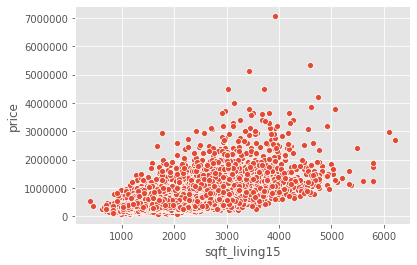

In [40]:
sns.scatterplot(data2['sqft_living15'],data2['price']) #square footage of a home's nearest 15 neighbors vs it's price


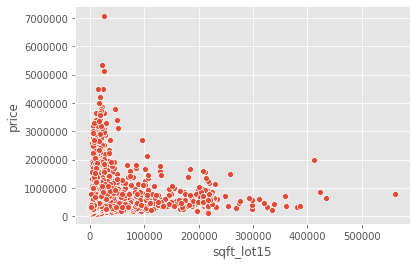

In [41]:
sns.scatterplot(data2['sqft_lot15'],data2['price']) #square footage of the lot of the nearest 15 neighbors vs it's price

Answer: While a home's squarefootage and lot size are highly correlated with those of its neighbors, they are poor predictors a homes actual home size or lot size. Additionally, the home size of a home's 15 closest neighbors is only loosly connected to a home's price.

# Preparing data for modelling

In [42]:
data2['usage']

1        0.354874
3        0.392000
4        0.207921
5        0.053174
8        0.238286
           ...   
21584    0.552671
21590    0.487500
21593    0.397385
21594    0.755556
21596    0.947955
Name: usage, Length: 14857, dtype: float64

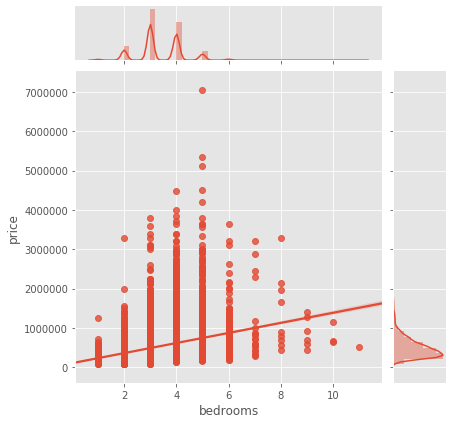

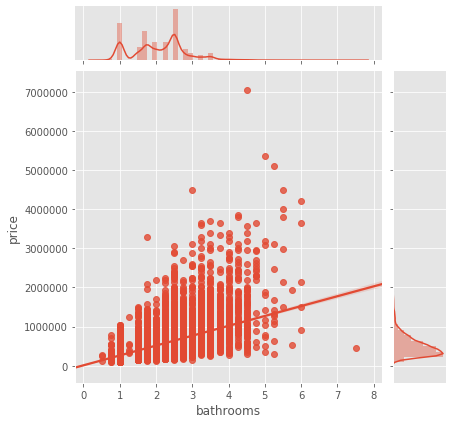

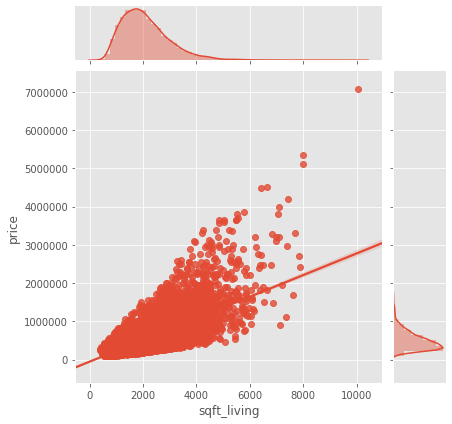

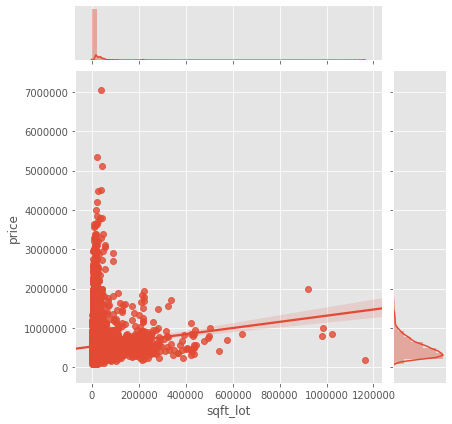

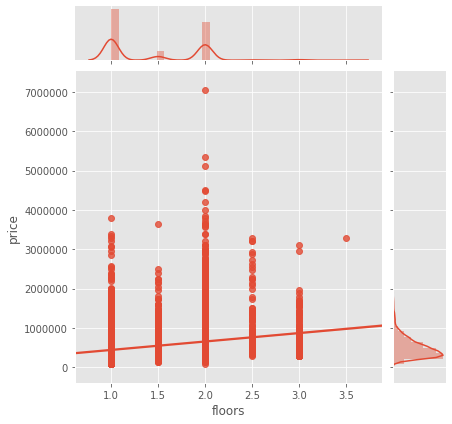

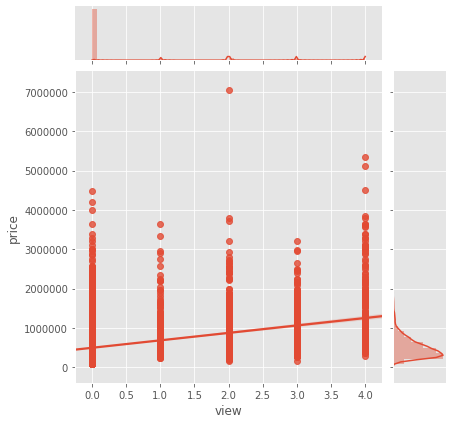

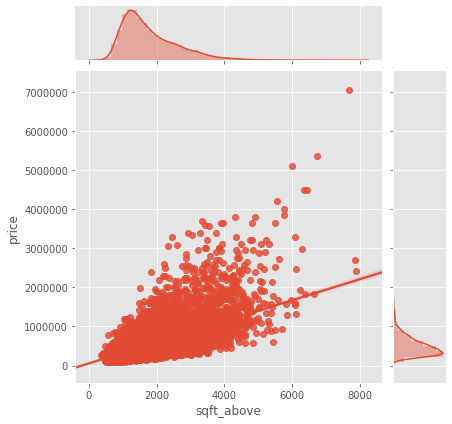

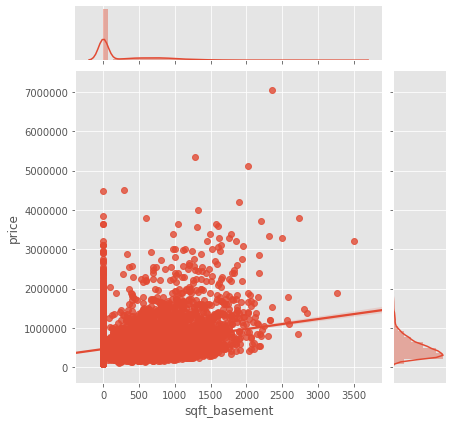

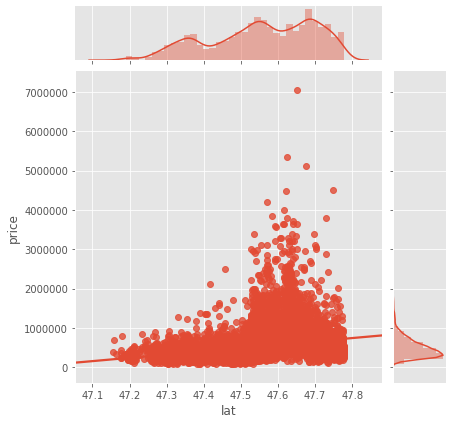

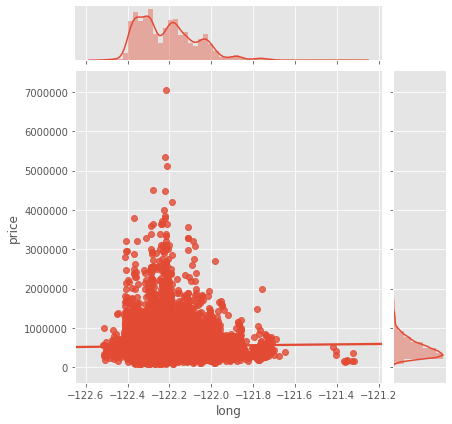

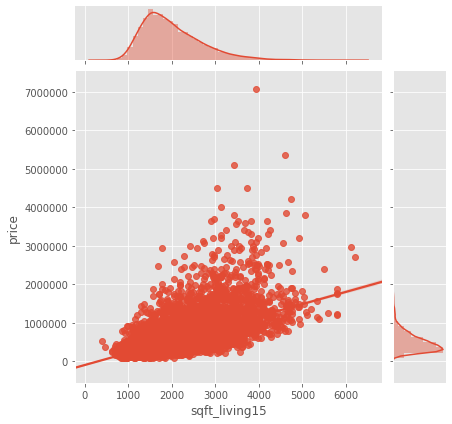

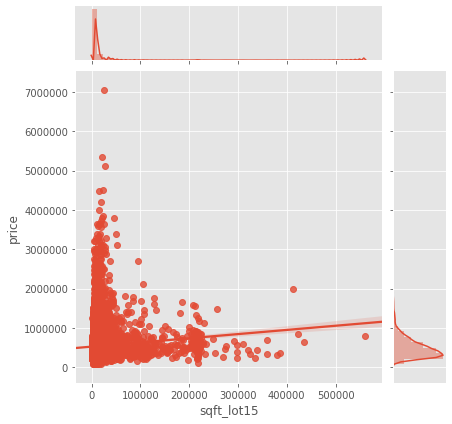

In [43]:
# Define list of non-catagory/dummy variables
cont_feat = ['bedrooms','bathrooms','sqft_living', 'sqft_lot','floors','view', 'sqft_above','sqft_basement','lat','long', 'sqft_living15', 'sqft_lot15']


#  Plot jointplots
for feature in cont_feat:
    sns.jointplot(x = data2[feature], y = data2['price'], kind = 'reg')


varriables other then long and sqft_lot15 appear  to have a linear relationship with price

In [44]:
# test for colleations in the variables
df=data2.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#drop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates.
df.drop_duplicates(inplace=True)

#correlated variables
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.873731
"(floors_2.0, floors)",0.837622
"(sqft_living, bathrooms)",0.771224
"(sqft_living, sqft_living15)",0.757487


multicollinearity issues (per table above)

(sqft_living, sqft_above)	0.873731

(floors, floors_2.0)	0.837622

(sqft_living, bathrooms)	0.771224

(sqft_living, sqft_living15)	0.757487



Dropping sqft_living elliminates the main collinearity issues. Floors will be tested to see if it is best as a catagory or not.


In [45]:
data2=data2.drop('sqft_living',axis=1)

In [46]:
data2.head()

,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,...,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,usage
1,2014-12-09,538000.0,3,2.25,7242,2.0,0.0,0.0,2170,400.0,...,0,0,0,0,0,0,0,0,0,0.354874
3,2014-12-09,604000.0,4,3.00,5000,1.0,0.0,0.0,1050,910.0,...,0,0,0,0,0,0,0,0,0,0.392000
4,2015-02-18,510000.0,3,2.00,8080,1.0,0.0,0.0,1680,0.0,...,0,0,0,0,0,0,0,0,0,0.207921
5,2014-05-12,1230000.0,4,4.50,101930,1.0,0.0,0.0,3890,1530.0,...,0,0,0,0,0,0,0,0,0,0.053174
8,2015-04-15,229500.0,3,1.00,7470,1.0,0.0,0.0,1050,730.0,...,0,0,0,0,0,0,0,0,0,0.238286


In [47]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [48]:
data2.columns=data2.columns.str.replace('.','_')
data2.columns=data2.columns.str.replace(' ','_')


# Initial model

In [177]:
data2['age']

1        63
3        49
4        28
5        13
8        55
         ..
21584     6
21590     6
21593     1
21594     5
21596     6
Name: age, Length: 14857, dtype: int64

In [54]:
# baseline model



y=data[['price']]
X=data.drop(['price','date'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 42534995592.25652
Test Mean Squarred Error: 44553462124.30715


In [58]:
outcome = 'price'

x_cols = list(X.columns)
# x_cols.remove('date')
# x_cols.remove('price')


predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     2130.
Date:                Sun, 25 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:48:05   Log-Likelihood:            -2.1065e+05
No. Observations:               15421   AIC:                         4.213e+05
Df Residuals:                   15405   BIC:                         4.215e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.902e+05   3.52e+06      0.054      0.957   -6.71e+06    7.09e+06
bedrooms      -5.001e+04   2400.830    -20.831      0.000   -5.47e+04   -4.53e+04
bathrooms      5.527e+04   3963.612     13.945      0.000    4.75e+04     6.3e+04
sqft_living     145.4068      2.648     54.916      0.000     140.217     150.597
sqft_lot          0.1000      0.061      1.641      0.101      -0.019       0.219
floors         2.005e+04   4383.130      4.575      0.000    1.15e+04    2.86e+04
waterfront     5.965e+05   2.13e+04     27.982      0.000    5.55e+05    6.38e+05
view           5.945e+04   2623.030     22.663      0.000    5.43e+04    6.46e+04
sqft_above      100.8580      2.620     38.491      0.000      95.722     105.994
sqft_basement    44.5487      3.215     13.858      0.000      38.247      50.850
yr_built      -2234.1823     81.463    -27.426      0.000   -2393.859   -2074.506
yr_renovated     16.4141      4.437      3.699      0.000       7.717      25.111
zipcode        -660.9560     39.896    -16.567      0.000    -739.156    -582.756
lat            6.695e+05   1.29e+04     51.988      0.000    6.44e+05    6.95e+05
long          -3.037e+05   1.59e+04    -19.152      0.000   -3.35e+05   -2.73e+05
sqft_living15    66.5713      4.067     16.368      0.000      58.599      74.543
sqft_lot15       -0.3318      0.092     -3.611      0.000      -0.512      -0.152
==============================================================================
Omnibus:                    10098.982   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           388620.434
Skew:                           2.610   Prob(JB):                         0.00
Kurtosis:                      27.033   Cond. No.                     2.92e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.83e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Baseline model, in addition to high p values:
r^s=0.675, adj=0.674

Train Mean Squarred Error: 42,534,995,592.25652   $42B
Test Mean Squarred Error: 44,553,462,124.30715


In [63]:
y = data2[['price']]
X=data2.drop(['price','date'], axis=1)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 42534995592.25652
Test Mean Squarred Error: 44553462124.30715


In [65]:
from statsmodels.formula.api import ols

outcome = 'price'

x_cols = list(X.columns)


predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     376.8
Date:                Sun, 25 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:52:59   Log-Likelihood:            -1.9909e+05
No. Observations:               14857   AIC:                         3.985e+05
Df Residuals:                   14689   BIC:                         3.998e+05
Df Model:                         167                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.284e+04   1152.966    -11.136      0.000   -1.51e+04   -1.06e+04
bedrooms      -3.395e+04   5622.543     -6.039      0.000    -4.5e+04   -2.29e+04
bathrooms      3.664e+04   3246.241     11.287      0.000    3.03e+04     4.3e+04
sqft_lot          0.1685      0.048      3.485      0.000       0.074       0.263
floors         1.662e+05   2.92e+04      5.682      0.000    1.09e+05    2.24e+05
waterfront     6.188e+05   1.97e+04     31.451      0.000     5.8e+05    6.57e+05
view           6.419e+04   2287.950     28.055      0.000    5.97e+04    6.87e+04
sqft_above      242.1708      3.435     70.505      0.000     235.438     248.904
sqft_basement   152.2558      4.363     34.894      0.000     143.703     160.808
yr_built        -53.4727     83.759     -0.638      0.523    -217.652     110.706
yr_renovated     -0.7043      5.839     -0.121      0.904     -12.149      10.740
zipcode        -417.4820     76.304     -5.471      0.000    -567.047    -267.917
lat            2.134e+05    7.6e+04      2.809      0.005    6.45e+04    3.62e+05
long          -2.502e+05   5.59e+04     -4.476      0.000    -3.6e+05   -1.41e+05
sqft_living15    31.7068      3.419      9.273      0.000      25.005      38.409
sqft_lot15       -0.1246      0.075     -1.661      0.097      -0.272       0.022
beds_2         2.839e+04   1.36e+04      2.093      0.036    1798.602     5.5e+04
beds_3         3.027e+04   1.46e+04      2.076      0.038    1691.036    5.88e+04
beds_4         2.524e+04   1.77e+04      1.423      0.155   -9529.749       6e+04
beds_5         3.466e+04   2.22e+04      1.564      0.118   -8785.625    7.81e+04
beds_6         1.389e+04   2.86e+04      0.486      0.627   -4.22e+04    6.99e+04
beds_7         4.613e+04   4.52e+04      1.020      0.308   -4.25e+04    1.35e+05
beds_8         1.006e+05   6.11e+04      1.645      0.100   -1.93e+04     2.2e+05
beds_9        -1.476e+05   6.86e+04     -2.153      0.031   -2.82e+05   -1.32e+04
beds_10       -1.458e+05   8.49e+04     -1.717      0.086   -3.12e+05    2.06e+04
beds_11        1.118e+05   1.28e+05      0.876      0.381   -1.39e+05    3.62e+05
floors_1_5    -9.316e+04   1.54e+04     -6.058      0.000   -1.23e+05    -6.3e+04
floors_2_0    -1.977e+05   2.92e+04     -6.761      0.000   -2.55e+05    -1.4e+05
floors_2_5    -1.741e+05   4.58e+04     -3.802      0.000   -2.64e+05   -8.43e+04
floors_3_0    -3.523e+05    5.9e+04     -5.975      0.000   -4.68e+05   -2.37e+05
floors_3_5     5.556e+05   9.88e+04      5.624      0.000    3.62e+05    7.49e+05
views_1_0       2.72e+04   1.05e+04      2.581      0.010    6545.601    4.79e+04
views_2_0     -3.878e+04   6827.659     -5.679      0.000   -5.22e+04   -2.54e+04
views_3_0     -3.936e+04   8292.990     -4.746      0.000   -5.56e+04   -2.31e+04
views_4_0      5.815e+04   7635.185      7.616   

r^2=0.811, adj= 0.809
Train Mean Squarred Error: 42,534,995,592.25652
Test Mean Squarred Error: 44,553,462,124.30715



Drop initial variables with high p_values

drop year renovated, sqft_lot15 


add back age as substitute

In [67]:
data2['age']=pd.DatetimeIndex(data2['date']).year-data2['yr_built']


data3=data2.drop(['yr_renovated','sqft_lot15'],axis=1)
y = data3[['price']]
X = data3.drop(['price','date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 25624875341.35972
Test Mean Squarred Error: 24850711454.54593


In [68]:
outcome = 'price'

x_cols = list(data3.columns)
x_cols.remove('date')
x_cols.remove('price')


predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     379.9
Date:                Sun, 25 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:56:53   Log-Likelihood:            -1.9904e+05
No. Observations:               14857   AIC:                         3.984e+05
Df Residuals:                   14689   BIC:                         3.997e+05
Df Model:                         167                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.67e+04   1210.654    -13.798      0.000   -1.91e+04   -1.43e+04
bedrooms       -3.37e+04   5604.208     -6.013      0.000   -4.47e+04   -2.27e+04
bathrooms      3.683e+04   3235.297     11.383      0.000    3.05e+04    4.32e+04
sqft_lot          0.1206      0.039      3.066      0.002       0.044       0.198
floors         1.664e+05   2.92e+04      5.707      0.000    1.09e+05    2.24e+05
waterfront     6.203e+05   1.96e+04     31.633      0.000    5.82e+05    6.59e+05
view           6.404e+04   2280.500     28.082      0.000    5.96e+04    6.85e+04
sqft_above      242.1600      3.422     70.765      0.000     235.452     248.868
sqft_basement   152.3819      4.342     35.091      0.000     143.870     160.894
yr_built       2.813e+04   2833.009      9.931      0.000    2.26e+04    3.37e+04
zipcode       -1001.8135     95.610    -10.478      0.000   -1189.221    -814.406
lat            2.012e+05   7.57e+04      2.658      0.008    5.28e+04     3.5e+05
long          -2.589e+05   5.56e+04     -4.657      0.000   -3.68e+05    -1.5e+05
sqft_living15    31.6258      3.402      9.298      0.000      24.958      38.293
beds_2         2.849e+04   1.35e+04      2.107      0.035    1992.205     5.5e+04
beds_3          2.95e+04   1.45e+04      2.030      0.042    1018.761     5.8e+04
beds_4         2.425e+04   1.77e+04      1.372      0.170   -1.04e+04    5.89e+04
beds_5         3.285e+04   2.21e+04      1.487      0.137   -1.05e+04    7.62e+04
beds_6         1.073e+04   2.85e+04      0.376      0.707   -4.51e+04    6.66e+04
beds_7         4.703e+04   4.51e+04      1.044      0.297   -4.13e+04    1.35e+05
beds_8         1.028e+05   6.09e+04      1.686      0.092   -1.67e+04    2.22e+05
beds_9        -1.576e+05   6.83e+04     -2.305      0.021   -2.92e+05   -2.36e+04
beds_10       -1.404e+05   8.46e+04     -1.659      0.097   -3.06e+05    2.55e+04
beds_11         1.16e+05   1.27e+05      0.911      0.362   -1.34e+05    3.66e+05
floors_1_5    -9.343e+04   1.53e+04     -6.096      0.000   -1.23e+05   -6.34e+04
floors_2_0    -1.976e+05   2.91e+04     -6.781      0.000   -2.55e+05    -1.4e+05
floors_2_5    -1.726e+05   4.56e+04     -3.782      0.000   -2.62e+05   -8.32e+04
floors_3_0    -3.533e+05   5.88e+04     -6.011      0.000   -4.69e+05   -2.38e+05
floors_3_5     5.572e+05   9.85e+04      5.659      0.000    3.64e+05     7.5e+05
views_1_0      2.697e+04   1.05e+04      2.567      0.010    6378.908    4.76e+04
views_2_0     -3.933e+04   6805.559     -5.779      0.000   -5.27e+04    -2.6e+04
views_3_0     -3.898e+04   8265.965     -4.716      0.000   -5.52e+04   -2.28e+04
views_4_0      5.817e+04   7610.257      7.644      0.000    4.33e+04    7.31e+04
reno_1934_0    7.582e+04   1.61e+05      0.472      0.637   -2.39e+05    3.91e+05
reno_1940_0   -7.981e+04   1.14e+05     -0.703   

r and adj. marginally better

2nd model: 
MSE down from about 42B to 25B

drop bedrooms: it should have apositive not a negative coef

try bed/bath ratio variable

In [69]:
data4=data3
data4['bed_bath_r']=data4['bedrooms']/data4['bathrooms']
data4=data4.drop(['bedrooms'],axis=1)



y = data4[['price']]
X = data4.drop(['price','date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 25002653426.033356
Test Mean Squarred Error: 26466816784675.883


In [71]:
outcome = 'price'

x_cols = list(data4.columns)
x_cols.remove('date')
x_cols.remove('price')


predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data4).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     388.9
Date:                Sun, 25 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:04:56   Log-Likelihood:            -1.9886e+05
No. Observations:               14857   AIC:                         3.981e+05
Df Residuals:                   14688   BIC:                         3.994e+05
Df Model:                         168                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.655e+04   1196.255    -13.834      0.000   -1.89e+04   -1.42e+04
bathrooms      1.287e+05   5816.979     22.126      0.000    1.17e+05     1.4e+05
sqft_lot          0.1152      0.039      2.963      0.003       0.039       0.191
floors         1.702e+05   2.88e+04      5.908      0.000    1.14e+05    2.27e+05
waterfront     6.094e+05   1.94e+04     31.440      0.000    5.71e+05    6.47e+05
view           6.282e+04   2254.247     27.868      0.000    5.84e+04    6.72e+04
sqft_above      232.4911      3.420     67.986      0.000     225.788     239.194
sqft_basement   150.8779      4.291     35.158      0.000     142.466     159.290
yr_built       2.771e+04   2799.338      9.900      0.000    2.22e+04    3.32e+04
zipcode       -1006.7066     94.471    -10.656      0.000   -1191.881    -821.532
lat            1.983e+05   7.48e+04      2.651      0.008    5.17e+04    3.45e+05
long          -2.691e+05   5.49e+04     -4.897      0.000   -3.77e+05   -1.61e+05
sqft_living15    35.8074      3.368     10.631      0.000      29.205      42.410
beds_2        -9.417e+04    1.5e+04     -6.280      0.000   -1.24e+05   -6.48e+04
beds_3          -1.9e+05   1.62e+04    -11.727      0.000   -2.22e+05   -1.58e+05
beds_4         -2.75e+05   1.78e+04    -15.452      0.000    -3.1e+05    -2.4e+05
beds_5        -3.477e+05      2e+04    -17.361      0.000   -3.87e+05   -3.08e+05
beds_6         -4.48e+05   2.43e+04    -18.424      0.000   -4.96e+05      -4e+05
beds_7         -4.83e+05   4.25e+04    -11.364      0.000   -5.66e+05      -4e+05
beds_8        -4.885e+05   6.12e+04     -7.981      0.000   -6.09e+05   -3.69e+05
beds_9        -8.428e+05   7.11e+04    -11.847      0.000   -9.82e+05   -7.03e+05
beds_10       -8.876e+05   9.58e+04     -9.265      0.000   -1.08e+06      -7e+05
beds_11       -6.425e+05   1.67e+05     -3.839      0.000   -9.71e+05   -3.14e+05
floors_1_5    -1.037e+05   1.52e+04     -6.841      0.000   -1.33e+05    -7.4e+04
floors_2_0    -2.014e+05   2.88e+04     -6.993      0.000   -2.58e+05   -1.45e+05
floors_2_5    -1.825e+05   4.51e+04     -4.046      0.000   -2.71e+05   -9.41e+04
floors_3_0    -3.671e+05   5.81e+04     -6.321      0.000   -4.81e+05   -2.53e+05
floors_3_5     5.792e+05   9.73e+04      5.952      0.000    3.88e+05     7.7e+05
views_1_0      2.887e+04   1.04e+04      2.781      0.005    8522.869    4.92e+04
views_2_0     -3.827e+04   6724.695     -5.692      0.000   -5.15e+04   -2.51e+04
views_3_0     -4.087e+04   8168.074     -5.004      0.000   -5.69e+04   -2.49e+04
views_4_0      5.828e+04   7519.573      7.750      0.000    4.35e+04     7.3e+04
reno_1934_0    9.437e+04   1.59e+05      0.594      0.552   -2.17e+05    4.06e+05
reno_1940_0   -8.331e+04   1.12e+05     -0.743      0.458   -3.03e+05    1.37e+05
reno_1944_0   -4.465e+04   1.59e+05     -0.281   

In [73]:
# drop high reno values

data6=data4

data6=data6.drop(['reno_2012_0', 'reno_2011_0', 'reno_2005_0','reno_2003_0', 'reno_2000_0'
                ,'reno_1999_0','reno_1998_0','reno_1997_0','reno_1996_0', 'reno_1994_0',
                 'reno_1993_0','reno_1992_0','reno_1990_0','reno_1989_0', 'reno_1988_0',
                 'reno_1984_0', 'reno_1983_0', 'reno_1982_0', 'reno_1981_0','reno_1980_0',
                 'reno_1979_0','reno_1978_0','reno_1977_0','reno_1976_0','reno_1975_0',
                 'reno_1974_0','reno_1973_0','reno_1972_0','reno_1971_0','reno_1969_0',
                 'reno_1968_0','reno_1967_0','reno_1965_0','reno_1964_0','reno_1962_0',
                 'reno_1960_0','reno_1959_0','reno_1958_0','reno_1957_0','reno_1955_0',
                 'reno_1953_0','reno_1951_0','reno_1950_0','reno_1948_0','reno_1945_0','reno_1944_0',
                  'reno_1940_0','reno_1934_0'],axis=1) 





y = data6[['price']]
X = data6.drop(['price','date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 25099168854.409687
Test Mean Squarred Error: 24155367601.755604


In [74]:
outcome = 'price'

x_cols = list(data6.columns)
x_cols.remove('date')
x_cols.remove('price')


predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data6).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     544.4
Date:                Sun, 25 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:32:02   Log-Likelihood:            -1.9888e+05
No. Observations:               14857   AIC:                         3.980e+05
Df Residuals:                   14736   BIC:                         3.989e+05
Df Model:                         120                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.65e+04   1193.735    -13.826      0.000   -1.88e+04   -1.42e+04
bathrooms      1.289e+05   5798.377     22.226      0.000    1.18e+05     1.4e+05
sqft_lot          0.1150      0.039      2.963      0.003       0.039       0.191
floors         1.709e+05   2.88e+04      5.935      0.000    1.14e+05    2.27e+05
waterfront      6.04e+05   1.92e+04     31.383      0.000    5.66e+05    6.42e+05
view           6.304e+04   2248.229     28.038      0.000    5.86e+04    6.74e+04
sqft_above      232.1674      3.413     68.033      0.000     225.478     238.856
sqft_basement   150.9545      4.281     35.263      0.000     142.564     159.345
yr_built       2.779e+04   2794.612      9.942      0.000    2.23e+04    3.33e+04
zipcode       -1005.2389     94.314    -10.658      0.000   -1190.105    -820.373
lat            2.017e+05   7.47e+04      2.701      0.007    5.53e+04    3.48e+05
long          -2.654e+05   5.48e+04     -4.842      0.000   -3.73e+05   -1.58e+05
sqft_living15    35.8377      3.362     10.660      0.000      29.248      42.427
beds_2         -9.55e+04   1.49e+04     -6.420      0.000   -1.25e+05   -6.63e+04
beds_3         -1.91e+05   1.61e+04    -11.874      0.000   -2.23e+05   -1.59e+05
beds_4        -2.759e+05   1.77e+04    -15.604      0.000   -3.11e+05   -2.41e+05
beds_5        -3.483e+05   1.99e+04    -17.485      0.000   -3.87e+05   -3.09e+05
beds_6        -4.492e+05   2.42e+04    -18.561      0.000   -4.97e+05   -4.02e+05
beds_7        -4.847e+05   4.24e+04    -11.441      0.000   -5.68e+05   -4.02e+05
beds_8        -4.897e+05   6.12e+04     -8.007      0.000    -6.1e+05    -3.7e+05
beds_9        -8.448e+05   7.11e+04    -11.887      0.000   -9.84e+05   -7.06e+05
beds_10       -8.889e+05   9.58e+04     -9.283      0.000   -1.08e+06   -7.01e+05
beds_11       -5.863e+05   1.61e+05     -3.643      0.000   -9.02e+05   -2.71e+05
floors_1_5    -1.039e+05   1.51e+04     -6.858      0.000   -1.34e+05   -7.42e+04
floors_2_0    -2.018e+05   2.88e+04     -7.012      0.000   -2.58e+05   -1.45e+05
floors_2_5    -1.807e+05   4.51e+04     -4.008      0.000   -2.69e+05   -9.23e+04
floors_3_0    -3.686e+05   5.81e+04     -6.348      0.000   -4.82e+05   -2.55e+05
floors_3_5     5.797e+05   9.73e+04      5.960      0.000    3.89e+05     7.7e+05
views_1_0       2.81e+04   1.03e+04      2.720      0.007    7850.379    4.83e+04
views_2_0     -3.857e+04   6706.227     -5.752      0.000   -5.17e+04   -2.54e+04
views_3_0     -4.106e+04   8130.208     -5.051      0.000    -5.7e+04   -2.51e+04
views_4_0      5.882e+04   7489.946      7.853      0.000    4.41e+04    7.35e+04
reno_1954_0    3.271e+05   1.59e+05      2.063      0.039    1.63e+04    6.38e+05
reno_1956_0   -2.138e+05   9.21e+04     -2.321      0.020   -3.94e+05   -3.33e+04
reno_1963_0   -2.749e+05   9.18e+04     -2.996   

r unchanged
error slightly better

drop high p values

In [75]:

data7=data6.drop(['zip_98070','zip_98032','zip_98023','zip_98019','zip_98011','zip_98003'],axis=1) 





y = data7[['price']]
X = data7.drop(['price','date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 25115453491.2662
Test Mean Squarred Error: 24171635055.084087


In [76]:
outcome = 'price'

x_cols = list(data7.columns)
x_cols.remove('date')
x_cols.remove('price')


predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data7).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     567.7
Date:                Sun, 25 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:38:39   Log-Likelihood:            -1.9889e+05
No. Observations:               14857   AIC:                         3.980e+05
Df Residuals:                   14741   BIC:                         3.989e+05
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.535e+06   2.48e+07      0.264      0.792   -4.21e+07    5.51e+07
bathrooms      1.288e+05   5798.936     22.207      0.000    1.17e+05     1.4e+05
sqft_lot          0.1097      0.039      2.839      0.005       0.034       0.185
floors         6.155e+05   1.68e+06      0.366      0.714   -2.68e+06    3.91e+06
waterfront     6.027e+05   1.92e+04     31.467      0.000    5.65e+05     6.4e+05
view            6.31e+04   2248.171     28.068      0.000    5.87e+04    6.75e+04
sqft_above      232.1207      3.412     68.025      0.000     225.432     238.809
sqft_basement   151.1474      4.281     35.310      0.000     142.757     159.538
yr_built       2.768e+04   2794.322      9.905      0.000    2.22e+04    3.32e+04
zipcode       -1052.5891    282.028     -3.732      0.000   -1605.400    -499.778
lat            3.358e+05    3.1e+04     10.820      0.000    2.75e+05    3.97e+05
long           -1.96e+05   4.01e+04     -4.891      0.000   -2.75e+05   -1.17e+05
sqft_living15    35.7694      3.358     10.651      0.000      29.187      42.352
beds_2        -9.537e+04   1.49e+04     -6.411      0.000   -1.25e+05   -6.62e+04
beds_3        -1.907e+05   1.61e+04    -11.858      0.000   -2.22e+05   -1.59e+05
beds_4        -2.756e+05   1.77e+04    -15.585      0.000    -3.1e+05   -2.41e+05
beds_5        -3.477e+05   1.99e+04    -17.457      0.000   -3.87e+05   -3.09e+05
beds_6        -4.489e+05   2.42e+04    -18.547      0.000   -4.96e+05   -4.01e+05
beds_7        -4.836e+05   4.24e+04    -11.416      0.000   -5.67e+05   -4.01e+05
beds_8        -4.896e+05   6.12e+04     -8.004      0.000    -6.1e+05    -3.7e+05
beds_9        -8.451e+05   7.11e+04    -11.889      0.000   -9.84e+05   -7.06e+05
beds_10       -8.892e+05   9.58e+04     -9.285      0.000   -1.08e+06   -7.01e+05
beds_11       -5.893e+05   1.61e+05     -3.661      0.000   -9.05e+05   -2.74e+05
floors_1_5    -3.263e+05   8.41e+05     -0.388      0.698   -1.97e+06    1.32e+06
floors_2_0    -6.461e+05   1.68e+06     -0.384      0.701   -3.94e+06    2.65e+06
floors_2_5    -8.472e+05   2.52e+06     -0.336      0.737   -5.79e+06     4.1e+06
floors_3_0    -1.257e+06   3.36e+06     -0.374      0.709   -7.85e+06    5.33e+06
floors_3_5    -5.299e+05    4.2e+06     -0.126      0.900   -8.77e+06    7.71e+06
views_1_0       2.74e+04   1.03e+04      2.653      0.008    7154.194    4.76e+04
views_2_0     -3.872e+04   6705.708     -5.774      0.000   -5.19e+04   -2.56e+04
views_3_0     -4.153e+04   8120.551     -5.115      0.000   -5.75e+04   -2.56e+04
views_4_0      5.943e+04   7478.478      7.947      0.000    4.48e+04    7.41e+04
reno_1954_0    3.239e+05   1.59e+05      2.042      0.041     1.3e+04    6.35e+05
reno_1956_0   -2.137e+05   9.21e+04     -2.319      0.020   -3.94e+05   -3.31e+04
reno_1963_0   -2.722e+05   9.18e+04     -2.965   

data7 looks potentially worse than data6

Go back to data6 and check for forrelations\

In [78]:
# test for colleations in the variables
df=data6.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#drop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates.
df.drop_duplicates(inplace=True)

#correlated variables
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(age, yr_built)",0.999870
"(floors, floors_2_0)",0.837622


try dropping floors and yr_built

In [82]:
data8=data6.drop(['floors','yr_built'],axis=1)

In [83]:



y = data8[['price']]
X = data8.drop(['date','price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 25257112949.953575
Test Mean Squarred Error: 24352989944.396454


In [84]:
outcome = 'price'

x_cols = list(data8.columns)
x_cols.remove('date')
x_cols.remove('price')


predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data8).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     544.5
Date:                Sun, 25 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:45:03   Log-Likelihood:            -1.9893e+05
No. Observations:               14857   AIC:                         3.981e+05
Df Residuals:                   14737   BIC:                         3.990e+05
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.27e+04   1134.970    -11.192      0.000   -1.49e+04   -1.05e+04
bathrooms      1.295e+05   5817.303     22.253      0.000    1.18e+05    1.41e+05
sqft_lot          0.1166      0.039      2.994      0.003       0.040       0.193
waterfront     6.028e+05   1.93e+04     31.218      0.000    5.65e+05    6.41e+05
view           6.317e+04   2255.643     28.003      0.000    5.87e+04    6.76e+04
sqft_above      231.9251      3.424     67.739      0.000     225.214     238.636
sqft_basement   150.3210      4.295     35.003      0.000     141.903     158.739
zipcode        -432.6501     75.070     -5.763      0.000    -579.797    -285.503
lat            2.112e+05   7.49e+04      2.820      0.005    6.44e+04    3.58e+05
long          -2.619e+05    5.5e+04     -4.762      0.000    -3.7e+05   -1.54e+05
sqft_living15    35.6339      3.373     10.565      0.000      29.023      42.245
beds_2        -9.609e+04   1.49e+04     -6.438      0.000   -1.25e+05   -6.68e+04
beds_3        -1.913e+05   1.61e+04    -11.855      0.000   -2.23e+05    -1.6e+05
beds_4        -2.763e+05   1.77e+04    -15.576      0.000   -3.11e+05   -2.42e+05
beds_5        -3.484e+05      2e+04    -17.434      0.000   -3.88e+05   -3.09e+05
beds_6        -4.486e+05   2.43e+04    -18.474      0.000   -4.96e+05   -4.01e+05
beds_7        -4.881e+05   4.25e+04    -11.482      0.000   -5.71e+05   -4.05e+05
beds_8        -4.954e+05   6.14e+04     -8.073      0.000   -6.16e+05   -3.75e+05
beds_9          -8.4e+05   7.13e+04    -11.780      0.000    -9.8e+05      -7e+05
beds_10       -8.991e+05   9.61e+04     -9.359      0.000   -1.09e+06   -7.11e+05
beds_11       -5.982e+05   1.61e+05     -3.704      0.000   -9.15e+05   -2.82e+05
floors_1_5    -1.902e+04   5444.731     -3.493      0.000   -2.97e+04   -8345.222
floors_2_0    -3.107e+04   4630.940     -6.709      0.000   -4.01e+04    -2.2e+04
floors_2_5     7.303e+04   1.77e+04      4.128      0.000    3.83e+04    1.08e+05
floors_3_0    -2.643e+04   1.36e+04     -1.941      0.052   -5.31e+04     263.102
floors_3_5     1.005e+06   1.69e+05      5.940      0.000    6.73e+05    1.34e+06
views_1_0      2.834e+04   1.04e+04      2.734      0.006    8019.694    4.87e+04
views_2_0     -3.815e+04   6728.318     -5.670      0.000   -5.13e+04    -2.5e+04
views_3_0     -4.153e+04   8157.022     -5.091      0.000   -5.75e+04   -2.55e+04
views_4_0      5.892e+04   7514.763      7.841      0.000    4.42e+04    7.37e+04
reno_1954_0    3.165e+05   1.59e+05      1.989      0.047    4651.226    6.28e+05
reno_1956_0    -2.14e+05   9.24e+04     -2.315      0.021   -3.95e+05   -3.28e+04
reno_1963_0   -2.763e+05   9.21e+04     -3.001      0.003   -4.57e+05   -9.58e+04
reno_1970_0   -1.456e+05   5.64e+04     -2.581      0.010   -2.56e+05    -3.5e+04
reno_1985_0   -1.018e+05   4.81e+04     -2.115   

Drop age



In [85]:
data9=data8.drop(['age','floors_3_0'], axis=1)



y = data9[['price']]
X = data9.drop(['price','date'], axis=1)
# X = data9.drop(['date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 25269073756.732647
Test Mean Squarred Error: 24332822392.586823


In [86]:
outcome = 'price'

x_cols = list(data9.columns)
x_cols.remove('date')
x_cols.remove('price')


predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data9).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     553.7
Date:                Sun, 25 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:59:01   Log-Likelihood:            -1.9894e+05
No. Observations:               14857   AIC:                         3.981e+05
Df Residuals:                   14739   BIC:                         3.990e+05
Df Model:                         117                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.271e+04   1128.795    -11.264      0.000   -1.49e+04   -1.05e+04
bathrooms      1.285e+05   5765.223     22.284      0.000    1.17e+05     1.4e+05
sqft_lot          0.1101      0.039      2.839      0.005       0.034       0.186
waterfront     6.024e+05   1.93e+04     31.202      0.000    5.65e+05     6.4e+05
view           6.296e+04   2251.389     27.966      0.000    5.86e+04    6.74e+04
sqft_above      231.3362      3.411     67.819      0.000     224.650     238.022
sqft_basement   152.1280      4.188     36.328      0.000     143.920     160.336
zipcode        -434.4533     74.982     -5.794      0.000    -581.428    -287.479
lat            2.127e+05   7.49e+04      2.840      0.005    6.59e+04    3.59e+05
long          -2.628e+05   5.49e+04     -4.786      0.000    -3.7e+05   -1.55e+05
sqft_living15    35.7632      3.369     10.615      0.000      29.159      42.367
beds_2        -9.592e+04   1.49e+04     -6.430      0.000   -1.25e+05   -6.67e+04
beds_3         -1.91e+05   1.61e+04    -11.849      0.000   -2.23e+05   -1.59e+05
beds_4        -2.757e+05   1.77e+04    -15.553      0.000    -3.1e+05   -2.41e+05
beds_5        -3.475e+05      2e+04    -17.399      0.000   -3.87e+05   -3.08e+05
beds_6        -4.476e+05   2.43e+04    -18.435      0.000   -4.95e+05      -4e+05
beds_7        -4.856e+05   4.25e+04    -11.429      0.000   -5.69e+05   -4.02e+05
beds_8        -4.931e+05   6.14e+04     -8.038      0.000   -6.13e+05   -3.73e+05
beds_9        -8.362e+05   7.13e+04    -11.735      0.000   -9.76e+05   -6.97e+05
beds_10       -8.972e+05   9.61e+04     -9.339      0.000   -1.09e+06   -7.09e+05
beds_11       -5.953e+05   1.61e+05     -3.688      0.000   -9.12e+05   -2.79e+05
floors_1_5    -1.693e+04   5160.724     -3.280      0.001    -2.7e+04   -6811.350
floors_2_0    -2.811e+04   4306.181     -6.528      0.000   -3.66e+04   -1.97e+04
floors_2_5     7.739e+04   1.75e+04      4.410      0.000     4.3e+04    1.12e+05
floors_3_5      1.01e+06   1.69e+05      5.968      0.000    6.78e+05    1.34e+06
views_1_0      2.855e+04   1.04e+04      2.755      0.006    8234.778    4.89e+04
views_2_0     -3.805e+04   6726.646     -5.657      0.000   -5.12e+04   -2.49e+04
views_3_0     -4.133e+04   8156.978     -5.067      0.000   -5.73e+04   -2.53e+04
views_4_0      5.862e+04   7513.189      7.803      0.000    4.39e+04    7.34e+04
reno_1954_0    3.166e+05   1.59e+05      1.990      0.047    4768.115    6.28e+05
reno_1956_0   -2.142e+05   9.23e+04     -2.320      0.020   -3.95e+05   -3.32e+04
reno_1963_0   -2.752e+05   9.21e+04     -2.990      0.003   -4.56e+05   -9.48e+04
reno_1970_0   -1.445e+05   5.63e+04     -2.565      0.010   -2.55e+05   -3.41e+04
reno_1985_0   -1.017e+05   4.81e+04     -2.114      0.035   -1.96e+05   -7418.907
reno_1986_0   -2.016e+05   4.82e+04     -4.188   

In [87]:
# test for colleations in the variables
df=data9.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#drop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates.
df.drop_duplicates(inplace=True)

#correlated variables
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,


no more correlations but values are not improving 

In [99]:
data10=data9.drop(['zipcode'], axis=1)

y = data10[['price']]

X = data10.drop(['price','date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 25269073756.732594
Test Mean Squarred Error: 24332822392.59151


In [100]:
outcome = 'price'

x_cols = list(data10.columns)
x_cols.remove('date')
x_cols.remove('price')


predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data10).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     553.7
Date:                Sun, 25 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:11:16   Log-Likelihood:            -1.9894e+05
No. Observations:               14857   AIC:                         3.981e+05
Df Residuals:                   14739   BIC:                         3.990e+05
Df Model:                         117                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.259e+07   7.35e+06     -5.796      0.000    -5.7e+07   -2.82e+07
bathrooms      1.285e+05   5765.223     22.284      0.000    1.17e+05     1.4e+05
sqft_lot          0.1101      0.039      2.839      0.005       0.034       0.186
waterfront     6.024e+05   1.93e+04     31.202      0.000    5.65e+05     6.4e+05
view           6.296e+04   2251.389     27.966      0.000    5.86e+04    6.74e+04
sqft_above      231.3362      3.411     67.819      0.000     224.650     238.022
sqft_basement   152.1280      4.188     36.328      0.000     143.920     160.336
lat            2.127e+05   7.49e+04      2.840      0.005    6.59e+04    3.59e+05
long          -2.628e+05   5.49e+04     -4.786      0.000    -3.7e+05   -1.55e+05
sqft_living15    35.7632      3.369     10.615      0.000      29.159      42.367
beds_2        -9.592e+04   1.49e+04     -6.430      0.000   -1.25e+05   -6.67e+04
beds_3         -1.91e+05   1.61e+04    -11.849      0.000   -2.23e+05   -1.59e+05
beds_4        -2.757e+05   1.77e+04    -15.553      0.000    -3.1e+05   -2.41e+05
beds_5        -3.475e+05      2e+04    -17.399      0.000   -3.87e+05   -3.08e+05
beds_6        -4.476e+05   2.43e+04    -18.435      0.000   -4.95e+05      -4e+05
beds_7        -4.856e+05   4.25e+04    -11.429      0.000   -5.69e+05   -4.02e+05
beds_8        -4.931e+05   6.14e+04     -8.038      0.000   -6.13e+05   -3.73e+05
beds_9        -8.362e+05   7.13e+04    -11.735      0.000   -9.76e+05   -6.97e+05
beds_10       -8.972e+05   9.61e+04     -9.339      0.000   -1.09e+06   -7.09e+05
beds_11       -5.953e+05   1.61e+05     -3.688      0.000   -9.12e+05   -2.79e+05
floors_1_5    -1.693e+04   5160.724     -3.280      0.001    -2.7e+04   -6811.350
floors_2_0    -2.811e+04   4306.181     -6.528      0.000   -3.66e+04   -1.97e+04
floors_2_5     7.739e+04   1.75e+04      4.410      0.000     4.3e+04    1.12e+05
floors_3_5      1.01e+06   1.69e+05      5.968      0.000    6.78e+05    1.34e+06
views_1_0      2.855e+04   1.04e+04      2.755      0.006    8234.778    4.89e+04
views_2_0     -3.805e+04   6726.646     -5.657      0.000   -5.12e+04   -2.49e+04
views_3_0     -4.133e+04   8156.978     -5.067      0.000   -5.73e+04   -2.53e+04
views_4_0      5.862e+04   7513.189      7.803      0.000    4.39e+04    7.34e+04
reno_1954_0    3.166e+05   1.59e+05      1.990      0.047    4768.114    6.28e+05
reno_1956_0   -2.142e+05   9.23e+04     -2.320      0.020   -3.95e+05   -3.32e+04
reno_1963_0   -2.752e+05   9.21e+04     -2.990      0.003   -4.56e+05   -9.48e+04
reno_1970_0   -1.445e+05   5.63e+04     -2.565      0.010   -2.55e+05   -3.41e+04
reno_1985_0   -1.017e+05   4.81e+04     -2.114      0.035   -1.96e+05   -7418.907
reno_1986_0   -2.016e+05   4.82e+04     -4.188      0.000   -2.96e+05   -1.07e+05
reno_1987_0    9.595e+04   4.61e+04      2.082   

very little change

high p values:
zip_98003	
zip_98011
zip_98019	
zip_98028
zip_98030
zip_98031
zip_98032
zip_98092
zip_98146
zip_98148
zip_98155
zip_98166
zip_98168	
zip_98198

In [96]:
# $ value of error
np.sqrt(45455163541.45786)

213202.16589298024

In [104]:
data9['price'].describe()

count    1.485700e+04
mean     5.414836e+05
std      3.673019e+05
min      8.200000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.495000e+05
max      7.060000e+06
Name: price, dtype: float64

In [101]:
# if location matters than some underieing location variable is changed by both lat and long

data10['lat_long']=data10['lat']*data10['long']

In [105]:
data11=data10.drop(['lat','long'],axis=1)
y = data11[['price']]

X = data11.drop(['price','date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 25279354132.622612
Test Mean Squarred Error: 24355477209.828045


In [106]:
outcome = 'price'

x_cols = list(data11.columns)
x_cols.remove('date')
x_cols.remove('price')


predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data11).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     558.1
Date:                Sun, 25 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:23:46   Log-Likelihood:            -1.9894e+05
No. Observations:               14857   AIC:                         3.981e+05
Df Residuals:                   14740   BIC:                         3.990e+05
Df Model:                         116                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.563e+07   3.03e+06     -5.161      0.000   -2.16e+07   -9.69e+06
bathrooms      1.283e+05   5766.076     22.244      0.000    1.17e+05     1.4e+05
sqft_lot          0.1051      0.039      2.714      0.007       0.029       0.181
waterfront      6.04e+05   1.93e+04     31.295      0.000    5.66e+05    6.42e+05
view           6.306e+04   2251.643     28.007      0.000    5.86e+04    6.75e+04
sqft_above      231.1435      3.411     67.760      0.000     224.457     237.830
sqft_basement   152.0823      4.189     36.309      0.000     143.872     160.292
sqft_living15    35.8073      3.370     10.626      0.000      29.202      42.413
beds_2        -9.552e+04   1.49e+04     -6.402      0.000   -1.25e+05   -6.63e+04
beds_3        -1.904e+05   1.61e+04    -11.810      0.000   -2.22e+05   -1.59e+05
beds_4         -2.75e+05   1.77e+04    -15.510      0.000    -3.1e+05    -2.4e+05
beds_5        -3.465e+05      2e+04    -17.346      0.000   -3.86e+05   -3.07e+05
beds_6        -4.467e+05   2.43e+04    -18.394      0.000   -4.94e+05   -3.99e+05
beds_7        -4.845e+05   4.25e+04    -11.399      0.000   -5.68e+05   -4.01e+05
beds_8        -4.919e+05   6.14e+04     -8.017      0.000   -6.12e+05   -3.72e+05
beds_9         -8.35e+05   7.13e+04    -11.715      0.000   -9.75e+05   -6.95e+05
beds_10       -8.975e+05   9.61e+04     -9.340      0.000   -1.09e+06   -7.09e+05
beds_11       -5.957e+05   1.61e+05     -3.689      0.000   -9.12e+05   -2.79e+05
floors_1_5    -1.742e+04   5158.980     -3.376      0.001   -2.75e+04   -7304.764
floors_2_0    -2.808e+04   4307.175     -6.520      0.000   -3.65e+04   -1.96e+04
floors_2_5     7.738e+04   1.76e+04      4.409      0.000     4.3e+04    1.12e+05
floors_3_5     1.013e+06   1.69e+05      5.986      0.000    6.81e+05    1.34e+06
views_1_0      2.858e+04   1.04e+04      2.757      0.006    8263.299    4.89e+04
views_2_0     -3.798e+04   6728.181     -5.645      0.000   -5.12e+04   -2.48e+04
views_3_0     -4.137e+04   8158.880     -5.071      0.000   -5.74e+04   -2.54e+04
views_4_0      5.864e+04   7514.952      7.803      0.000    4.39e+04    7.34e+04
reno_1954_0    3.123e+05   1.59e+05      1.962      0.050     360.747    6.24e+05
reno_1956_0   -2.137e+05   9.24e+04     -2.314      0.021   -3.95e+05   -3.27e+04
reno_1963_0   -2.725e+05   9.21e+04     -2.959      0.003   -4.53e+05    -9.2e+04
reno_1970_0   -1.449e+05   5.64e+04     -2.571      0.010   -2.55e+05   -3.45e+04
reno_1985_0   -1.021e+05   4.81e+04     -2.122      0.034   -1.96e+05   -7783.444
reno_1986_0   -2.006e+05   4.82e+04     -4.165      0.000   -2.95e+05   -1.06e+05
reno_1987_0    9.442e+04   4.61e+04      2.048      0.041    4063.117    1.85e+05
reno_1991_0   -1.205e+05   4.82e+04     -2.501      0.012   -2.15e+05    -2.6e+04
reno_1995_0    3.129e+05   6.51e+04      4.807   

not much change but seems logical

drop highest p values

In [110]:
data12=data11.drop(['zip_98198','zip_98188','zip_98178','zip_98168','zip_98155','zip_98148','zip_98092','zip_98077',
                   'zip_98032','zip_98031','zip_98030','zip_98028','zip_98014','zip_98011','zip_98003'],axis=1)
y = data12[['price']]
X = data12.drop(['price','date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 25296793575.968796
Test Mean Squarred Error: 24334300596.065533


In [112]:
outcome = 'price'

x_cols = list(data12.columns)
x_cols.remove('date')
x_cols.remove('price')


predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data12).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     641.3
Date:                Sun, 25 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:42:14   Log-Likelihood:            -1.9894e+05
No. Observations:               14857   AIC:                         3.981e+05
Df Residuals:                   14755   BIC:                         3.989e+05
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.648e+07   7.89e+05    -20.873      0.000    -1.8e+07   -1.49e+07
bathrooms      1.283e+05   5759.428     22.273      0.000    1.17e+05     1.4e+05
sqft_lot          0.1122      0.038      2.942      0.003       0.037       0.187
waterfront     6.032e+05   1.93e+04     31.283      0.000    5.65e+05    6.41e+05
view           6.273e+04   2240.049     28.005      0.000    5.83e+04    6.71e+04
sqft_above      231.3173      3.405     67.932      0.000     224.643     237.992
sqft_basement   151.9109      4.178     36.356      0.000     143.721     160.101
sqft_living15    35.9079      3.333     10.774      0.000      29.375      42.441
beds_2        -9.538e+04   1.49e+04     -6.398      0.000   -1.25e+05   -6.62e+04
beds_3          -1.9e+05   1.61e+04    -11.808      0.000   -2.21e+05   -1.58e+05
beds_4        -2.746e+05   1.77e+04    -15.526      0.000   -3.09e+05    -2.4e+05
beds_5        -3.462e+05   1.99e+04    -17.367      0.000   -3.85e+05   -3.07e+05
beds_6        -4.465e+05   2.42e+04    -18.427      0.000   -4.94e+05   -3.99e+05
beds_7        -4.836e+05   4.24e+04    -11.393      0.000   -5.67e+05      -4e+05
beds_8        -4.912e+05   6.13e+04     -8.010      0.000   -6.11e+05   -3.71e+05
beds_9        -8.347e+05   7.12e+04    -11.718      0.000   -9.74e+05   -6.95e+05
beds_10        -8.96e+05    9.6e+04     -9.329      0.000   -1.08e+06   -7.08e+05
beds_11       -5.952e+05   1.61e+05     -3.688      0.000   -9.12e+05   -2.79e+05
floors_1_5     -1.72e+04   5151.235     -3.339      0.001   -2.73e+04   -7101.610
floors_2_0    -2.787e+04   4295.952     -6.487      0.000   -3.63e+04   -1.94e+04
floors_2_5     7.784e+04   1.75e+04      4.437      0.000    4.35e+04    1.12e+05
floors_3_5     1.012e+06   1.69e+05      5.983      0.000     6.8e+05    1.34e+06
views_1_0      2.787e+04   1.03e+04      2.693      0.007    7580.992    4.82e+04
views_2_0     -3.819e+04   6721.962     -5.682      0.000   -5.14e+04    -2.5e+04
views_3_0     -4.153e+04   8154.172     -5.093      0.000   -5.75e+04   -2.55e+04
views_4_0      5.896e+04   7508.960      7.852      0.000    4.42e+04    7.37e+04
reno_1954_0    3.117e+05   1.59e+05      1.959      0.050    -113.769    6.24e+05
reno_1956_0   -2.142e+05   9.23e+04     -2.320      0.020   -3.95e+05   -3.32e+04
reno_1963_0   -2.722e+05   9.21e+04     -2.957      0.003   -4.53e+05   -9.17e+04
reno_1970_0    -1.44e+05   5.63e+04     -2.556      0.011   -2.54e+05   -3.36e+04
reno_1985_0   -1.026e+05   4.81e+04     -2.132      0.033   -1.97e+05   -8253.624
reno_1986_0    -2.01e+05   4.81e+04     -4.176      0.000   -2.95e+05   -1.07e+05
reno_1987_0    9.342e+04   4.61e+04      2.027      0.043    3097.114    1.84e+05
reno_1991_0   -1.224e+05   4.81e+04     -2.542      0.011   -2.17e+05    -2.8e+04
reno_1995_0    3.132e+05   6.51e+04      4.814   

In [ ]:
drop remaining hihg p values

In [113]:
data13=data12.drop(['zip_98166','zip_98058','zip_98055','zip_98042','reno_1954_0'],axis=1)

y = data13[['price']]
X = data13.drop(['price','date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 25318953286.252693
Test Mean Squarred Error: 24350704853.92504


In [115]:
print(np.sqrt(25318953286.252693))

159119.30519661243


In [114]:
outcome = 'price'

x_cols = list(data13.columns)
x_cols.remove('date')
x_cols.remove('price')


predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data13).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     674.2
Date:                Sun, 25 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:45:19   Log-Likelihood:            -1.9895e+05
No. Observations:               14857   AIC:                         3.981e+05
Df Residuals:                   14760   BIC:                         3.988e+05
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.59e+07   7.42e+05    -21.446      0.000   -1.74e+07   -1.44e+07
bathrooms      1.282e+05   5758.191     22.271      0.000    1.17e+05     1.4e+05
sqft_lot          0.1127      0.038      2.954      0.003       0.038       0.187
waterfront     6.041e+05   1.93e+04     31.339      0.000    5.66e+05    6.42e+05
view           6.269e+04   2236.744     28.028      0.000    5.83e+04    6.71e+04
sqft_above      231.3643      3.404     67.975      0.000     224.693     238.036
sqft_basement   151.8137      4.177     36.343      0.000     143.626     160.002
sqft_living15    36.0043      3.330     10.811      0.000      29.476      42.532
beds_2        -9.585e+04   1.49e+04     -6.432      0.000   -1.25e+05   -6.66e+04
beds_3        -1.902e+05   1.61e+04    -11.834      0.000   -2.22e+05   -1.59e+05
beds_4        -2.749e+05   1.77e+04    -15.555      0.000    -3.1e+05    -2.4e+05
beds_5        -3.465e+05   1.99e+04    -17.401      0.000   -3.86e+05   -3.07e+05
beds_6        -4.467e+05   2.42e+04    -18.440      0.000   -4.94e+05   -3.99e+05
beds_7        -4.845e+05   4.24e+04    -11.415      0.000   -5.68e+05   -4.01e+05
beds_8        -4.915e+05   6.13e+04     -8.013      0.000   -6.12e+05   -3.71e+05
beds_9        -8.354e+05   7.12e+04    -11.725      0.000   -9.75e+05   -6.96e+05
beds_10       -8.964e+05   9.61e+04     -9.332      0.000   -1.08e+06   -7.08e+05
beds_11       -5.953e+05   1.61e+05     -3.688      0.000   -9.12e+05   -2.79e+05
floors_1_5    -1.738e+04   5151.574     -3.373      0.001   -2.75e+04   -7279.378
floors_2_0    -2.807e+04   4295.660     -6.534      0.000   -3.65e+04   -1.96e+04
floors_2_5     7.771e+04   1.75e+04      4.429      0.000    4.33e+04    1.12e+05
floors_3_5     1.012e+06   1.69e+05      5.978      0.000     6.8e+05    1.34e+06
views_1_0      2.815e+04   1.03e+04      2.722      0.007    7874.901    4.84e+04
views_2_0      -3.82e+04   6721.286     -5.684      0.000   -5.14e+04    -2.5e+04
views_3_0     -4.162e+04   8156.152     -5.103      0.000   -5.76e+04   -2.56e+04
views_4_0      5.895e+04   7508.569      7.851      0.000    4.42e+04    7.37e+04
reno_1956_0   -2.142e+05   9.24e+04     -2.319      0.020   -3.95e+05   -3.31e+04
reno_1963_0   -2.724e+05   9.21e+04     -2.958      0.003   -4.53e+05   -9.19e+04
reno_1970_0    -1.44e+05   5.64e+04     -2.555      0.011   -2.54e+05   -3.35e+04
reno_1985_0   -1.016e+05   4.81e+04     -2.111      0.035   -1.96e+05   -7265.595
reno_1986_0   -1.992e+05   4.81e+04     -4.140      0.000   -2.94e+05   -1.05e+05
reno_1987_0    9.298e+04   4.61e+04      2.017      0.044    2637.736    1.83e+05
reno_1991_0   -1.234e+05   4.82e+04     -2.562      0.010   -2.18e+05    -2.9e+04
reno_1995_0    3.151e+05   6.51e+04      4.842      0.000    1.88e+05    4.43e+05
reno_2001_0    2.893e+05   4.82e+04      6.002   

# Conclusion

*My final model (above) seems to work reasonably well but is questionable at long term predictions.

With an R-squared of 0.814 or 81.4% a clear majority of differences between my data and average are explained. 

A hypothetical home with no feutures i.e.the intercept, would have no a negative value. However, given that a home with no lot, sqft, or bathrooms could not exist, and all thesse feutures add value, this makes sense.  

Most significantly certain zipcodes are more likely to add a lot, $, to a homes value. Additionally, waterfront homes are very likely worth more. Noteworthy to a developer a basement's squarefootage is less valuable than that above ground. 

Additionally the model has an RMSE of $160,000 so, particulrly with cheaper homes, this should be taken with a grain of salt.


# Future work

It is worth exploring in the future non linear models. 

Additionally prices are likely to change over time so looking at homes sold over more years would be helpfull.

